Cost function - Linear regression with one variable


Tools

- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- local plotting routines in the lab_utils_uni.py file in the local directory

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
#%matplotlib widget

In [24]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [25]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

Your goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

In the previous lab, you determined that $b=100$ provided an optimal solution so let's set $b$ to 100 and focus on $w$.

<br/>
Below, use the slider control to select the value of $w$ that minimizes cost. It can take a few seconds for the plot to update.

In [26]:
# Function to update plot based on slider input
def update_plot(w):
    b = 100  # Fixed bias for this example
    cost = compute_cost(x_train, y_train, w, b)

    # Clear previous plot
    plt.clf()

    # Set the figure size (increase the width)
    plt.figure(figsize=(12, 5))  # Set width to 12, height to 5
    
    # Plot housing prices
    plt.subplot(1, 2, 1)
    plt.plot(x_train, w * x_train + b, color='blue', label='Our Prediction')
    plt.scatter(x_train, y_train, color='red', label='Actual Value')
    for i in range(len(x_train)):
        plt.plot([x_train[i], x_train[i]], [w * x_train[i] + b, y_train[i]], color='purple', linestyle='dotted', label='Cost for point' if i == 0 else "")
    plt.xlabel('Size (1000 sqft)')
    plt.ylabel('Price (in 1000s of dollars)')
    plt.title('Housing Prices')
    plt.legend()
    
    # Plot cost function vs w
    plt.subplot(1, 2, 2)
    w_range = np.linspace(0, 400, 100)
    costs = [compute_cost(x_train, y_train, wi, b) for wi in w_range]
    plt.plot(w_range, costs, color='blue')
    plt.scatter(w, cost, color='red', label=f'Cost at w={w:.2f}')
    plt.xlabel('w')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. w, (b fixed at {b})')
    plt.legend()
    
    # Show current cost
    plt.suptitle(f'Minimize Cost: Current Cost = {cost:.2f}')
    plt.show()

# Use interact to create a slider
interact(update_plot, w=(0, 400, 1))

interactive(children=(IntSlider(value=200, description='w', max=400), Output()), _dom_classes=('widget-interac…

<function __main__.update_plot(w)>

The plot contains a few points that are worth mentioning.
- cost is minimized when $w = 200$, which matches results from the previous lab
- Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when $w$ is either too large or too small.
- Using the `w` and `b` selected by minimizing cost results in a line which is a perfect fit to the data.

## Cost Function Visualization- 3D

You can see how cost varies with respect to *both* `w` and `b` by plotting in 3D or using a contour plot.   
It is worth noting that some of the plotting in this course can become quite involved. The plotting routines are provided and while it can be instructive to read through the code to become familiar with the methods, it is not needed to complete the course successfully. The routines are in lab_utils_uni.py in the local directory.

### Larger Data Set
It is instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line. What does that mean for the cost equation? Can we find $w$, and $b$ that will give us a cost of 0? 

In [27]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430, 630, 730,])

In [28]:
from mpl_toolkits.mplot3d import Axes3D

def plt_stationary(x_train, y_train):
    """
    Initializes the figure with three plots: housing prices, contour plot of cost function, and 3D surface plot.
    
    Args:
        x_train (ndarray): The input feature values (e.g., size of houses).
        y_train (ndarray): The target values (e.g., house prices).
    
    Returns:
        fig: The figure object.
        ax: The axes object for further updates.
        dyn_items: A dictionary containing dynamic plot elements for future updates.
    """
    # Initialize the figure with 3 subplots
    fig = plt.figure(figsize=(10, 10))
    
    # Subplot 1: Housing prices and predictions
    ax1 = fig.add_subplot(2, 2, 1)
    w = 200  # Initial weight
    b = 100  # Initial bias
    predictions = w * x_train + b
    
    prediction_line, = ax1.plot(x_train, predictions, color='blue', label='Our Prediction')
    actual_points = ax1.scatter(x_train, y_train, color='red', label='Actual Value')
    
    cost_lines = []
    for i in range(len(x_train)):
        line, = ax1.plot([x_train[i], x_train[i]], [predictions[i], y_train[i]], color='purple', linestyle='dotted')
        cost_lines.append(line)
    
    ax1.set_xlabel('Size (1000 sqft)')
    ax1.set_ylabel('Price (in 1000s of dollars)')
    ax1.legend()
    ax1.set_title('Housing Prices')

    # Subplot 2: Contour plot of the cost function with respect to w and b
    ax2 = fig.add_subplot(2, 2, 2)
    w_range = np.linspace(-100, 500, 100)
    b_range = np.linspace(-200, 300, 100)
    W, B = np.meshgrid(w_range, b_range)
    
    # Compute cost for each combination of w and b
    Z = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            Z[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])

    contour_plot = ax2.contour(W, B, Z, levels=50)
    ax2.set_xlabel('w')
    ax2.set_ylabel('b')
    ax2.set_title('Cost(w, b)')
    
    # Subplot 3: 3D surface plot of the cost function
    ax3 = fig.add_subplot(2, 1, 2, projection='3d')
    surface_plot = ax3.plot_surface(W, B, Z, cmap='viridis')
    ax3.set_xlabel('w')
    ax3.set_ylabel('b')
    ax3.set_zlabel('J(w, b)')
    ax3.set_title('Cost(w, b) [You can rotate this figure]')
    
    # Store dynamic elements for updates
    dyn_items = {
        'prediction_line': prediction_line,
        'cost_lines': cost_lines,
        'contour_plot': contour_plot,
        'surface_plot': surface_plot,
        'w': w,
        'b': b
    }
    
    return fig, (ax1, ax2, ax3), dyn_items


In [29]:
def plt_update_onclick(fig, ax, x_train, y_train, dyn_items):
    """
    Updates the plot whenever the user interacts with the graph (e.g., clicking on the contour plot).
    
    Args:
        fig: The figure object.
        ax: The axes object.
        x_train: The input features (e.g., house sizes).
        y_train: The target values (e.g., house prices).
        dyn_items: A dictionary of dynamic elements (prediction line, cost lines, etc.).
    """
    
    # Update the prediction line and cost points based on new weight 'w' and bias 'b'
    def update_plot(event):
        if event.button == 1:  # Left mouse click on the contour plot
            x_click, y_click = event.xdata, event.ydata
            
            if x_click is not None and y_click is not None:
                # Update w and b based on click coordinates
                dyn_items['w'] = x_click
                dyn_items['b'] = y_click
                
                # Recalculate predictions with new w and b
                w = dyn_items['w']
                b = dyn_items['b']
                predictions = w * x_train + b
                
                # Update the housing price prediction line
                dyn_items['prediction_line'].set_ydata(predictions)
                
                # Update cost lines
                for i, cost_line in enumerate(dyn_items['cost_lines']):
                    cost_line.set_ydata([predictions[i], y_train[i]])

                # Recalculate the cost for the updated w and b
                W, B = np.meshgrid(np.linspace(-100, 500, 100), np.linspace(-200, 300, 100))
                Z = np.zeros_like(W)
                for i in range(W.shape[0]):
                    for j in range(W.shape[1]):
                        Z[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])
                
                # Update the contour plot and 3D surface plot
                ax[1].collections.clear()  # Clear old contours
                ax[1].contour(W, B, Z, levels=50)
                ax[2].clear()
                ax[2].plot_surface(W, B, Z, cmap='viridis')
                
                # Re-draw the figure
                fig.canvas.draw()

    # Connect the event to the figure (click event)
    cid = fig.canvas.mpl_connect('button_press_event', update_plot)
    
    return cid


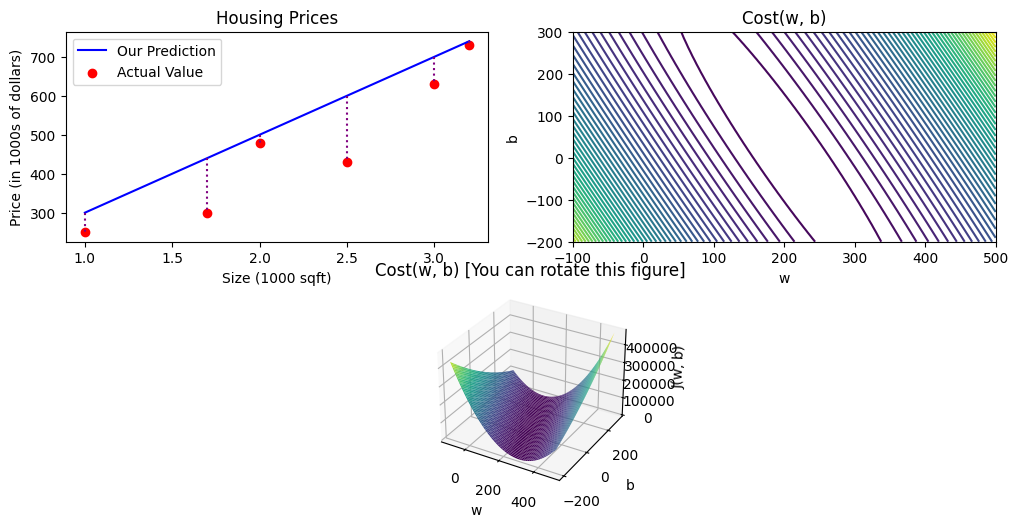

In [30]:
# Close any previous figures
plt.close('all')

# Initialize the figure and axes with increased width
fig, ax, dyn_items = plt_stationary(x_train, y_train)
fig.set_size_inches(12, 6)  # Set figure size (increase width to 12 and height to 6)

# Attach the interactive updater (for example, clicking or sliding to update costs)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)
